In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from utils import gradient_descent_reg, compute_cost_reg, sigmoid, plot_logreg_line, compute_cost, gradient_descent

# Part 5 ~ Iris dataset
multi-class - one-vs-all - logistic regression

In [8]:
# from sklearn import datasets
# import pandas as pd

# iris = datasets.load_iris()
# df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df.head()

<Figure size 800x600 with 0 Axes>

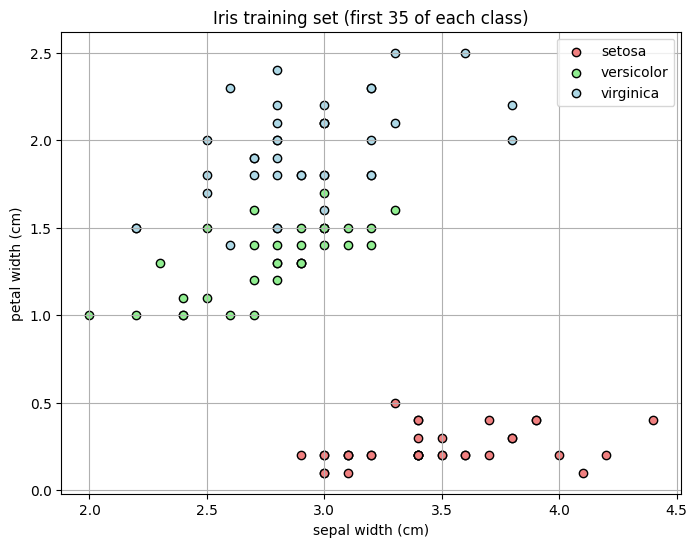

In [2]:
# ~ A ~ #
iris = datasets.load_iris()
sepw = np.array(iris.data[:, 1])
petw = np.array(iris.data[:, 3])
X = np.array([sepw, petw]).T

y = iris.target.reshape(-1,1)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(2, figsize=(8, 6))
plt.clf()

idx_setosa = np.arange(0, 35)
idx_versicolor = np.arange(50, 85)
idx_virginica = np.arange(100, 135)

X_s = X[idx_setosa]
X_v = X[idx_versicolor]
X_vi = X[idx_virginica]

plt.figure(figsize=(8, 6))
plt.scatter(X_s[:, 0],  X_s[:, 1],color='lightcoral', label='setosa',edgecolor='k')
plt.scatter(X_v[:, 0],  X_v[:, 1],color='lightgreen',label='versicolor',edgecolor='k')
plt.scatter(X_vi[:, 0], X_vi[:, 1], color='lightblue', label='virginica', edgecolor='k')

plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris training set (first 35 of each class)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# m = X.shape[0]
# X_bias = np.concatenate([np.ones((m,1)), X], axis=1)
# num_labels = 3  # setosa, versicolor, virginica
# alpha = 0.01
# num_iters = 300
# regularization = 1.0 

# def one_vs_all(X, y, num_labels, alpha, num_iters, λ):
#     """
#     Trains num_labels logistic classifiers using your gd_reg function.
#     X           – (m, n) with intercept column
#     y           – (m,1) labels in {0,1,2}
#     returns all_theta – (num_labels, n) matrix, where row k is θ for class k.
#     """
#     m, n = X.shape
#     all_theta = np.zeros((num_labels, n))

#     for k in range(num_labels):
#         # create a binary label vector (1 if class==k, else 0)
#         y_k = (y.flatten() == k).astype(int).reshape(-1,1)

#         # initialize θ to zeros
#         theta_init = np.zeros((n,1))

#         # run your regularized gradient descent:  
#         # theta_k is (n,1), J_history is (num_iters,1)
#         theta_k, J_history = gd_reg(X, y_k, theta_init, alpha, num_iters, λ)

#         # store the learned θ in the k-th row
#         all_theta[k, :] = theta_k.flatten()

#     return all_theta

In [ ]:
# idxs = np.concatenate([idx_setosa, idx_versicolor, idx_virginica])
# X_train = X[idxs]  
# y_train = y[idxs]
# print("X_train.shape:", X_train.shape)
# print("y_train.shape:", y_train.shape)

# m, n = X_train.shape 
# X_bias = np.hstack([np.ones((m,1)), X_train])  

# print("X_bias.shape:", X_bias.shape)

# k = 3 # for each class
# Y = np.zeros((m, k))

# # fill column k with 1’s where y_train == k
# for i in range(k):
#     # y_train flatten to (105,) so comparison broadcast→(105,)
#     Y[:,i] = (y_train.flatten() == i).astype(int)

# print("Y.shape:", Y.shape)

# # initialize Θ as zeros of shape (n+1, K) = (3, 3)
# initial_Theta = np.zeros((n+1, k))


# # learn all K classifiers in one go
# theta = gradient_descent_multi(X_bias, Y, initial_Theta, alpha=0.01, num_iters=300)
# print("Theta.shape:", theta.shape)  # → (3, 3)

# # we want all_theta as (K, n+1) so that row k is θₖ
# all_theta = theta.T
# print("all_theta.shape:", all_theta.shape)  # → (3, 3)
# # # def one_vs_all(X, y, num_labels, alpha=0.01, num_iters=300):
# # #     """
# # #     Trains num_labels logistic classifiers and returns
# # #     a matrix all_theta of shape (num_labels, n+1), 
# # #     where row i is the theta vector for class i.
# # #     """
# # #     m, n = X.shape
# # #     X_bies = np.concatenate([np.ones((m,1)), X], axis=1)
# # #     all_theta = np.zeros((num_labels, n+1)) # theta matrix for each classifier
    
# # #     for k in range(num_labels):
# # #         y_k = (y == k).astype(int)
# # #         initial_theta = np.zeros(n+1)
# # #         theta_k, J_hist = gradient_descent(X_bies, y_k, initial_theta, alpha, num_iters) # gd as optimizer

# # #         all_theta[k, :] = theta_k

# # #     return all_theta

# # def one_vs_all(X, y, num_labels, alpha=0.01, num_iters=300):
# #     """
# #     trains num_labels logistic classifiers at once by calling
# #     gradient_descent_multi - no per-class loops into utils.gradient_descent
# #     returns an (num_labels, n+1) all_theta.
# #     """
# #     m, n = X.shape
# #     X_bias = np.concatenate([np.ones((m,1)), X], axis=1)
    
    
# #     Y = np.zeros((m, num_labels))
# #     for k in range(num_labels):
# #         Y[:, k] = (y == k).astype(int)
        
# #     initial_Theta = np.zeros((n+1, num_labels))
# #     X_bies (m, n+1), Y (m, num_labels)
# #     theta = gradient_descent(X_bias, Y, initial_Theta, alpha, num_iters, True )   # returned shape is (n+1, num_labels)
 
# #     return theta.T

X_train.shape: (105, 2)
y_train.shape: (105, 1)
X_bias.shape: (105, 3)
Y.shape: (105, 3)


UnboundLocalError: cannot access local variable 'theta' where it is not associated with a value

In [39]:
# ——— Part A recap ———
iris = datasets.load_iris()
sepw = iris.data[:, 1]
petw = iris.data[:, 3]
X    = np.vstack((sepw, petw)).T   # (150,2)
y    = iris.target.reshape(-1,1)   # (150,1)

# training indices
idx_setosa     = np.arange(0,   35)
idx_versicolor = np.arange(50,  85)
idx_virginica  = np.arange(100, 135)

# ——— 1) assemble training set ———
idxs    = np.concatenate([idx_setosa, idx_versicolor, idx_virginica])
X_train = X[idxs]     # expect (105,2)
y_train = y[idxs]     # expect (105,1)

print("1) X_train.shape:", X_train.shape)
print("   y_train.shape:", y_train.shape)

# ——— 2) add bias column ———
m, n   = X_train.shape         # m=105, n=2
X_bias = np.hstack([np.ones((m,1)), X_train])  # (105,3)

print("2) X_bias.shape:", X_bias.shape)

# ——— 3) build one-vs-all label matrix Y ———
K = 3
Y = np.zeros((m, K))           # (105,3)
for k in range(K):
    Y[:, k] = (y_train.flatten() == k).astype(int)

print("3) Y.shape:", Y.shape)

# ——— 4) train all K classifiers at once ———
initial_Theta = np.zeros((n+1, K))  # (3,3)

Theta = gradient_descent_multi(
    X_bias,        # (105,3)
    Y,             # (105,3)
    initial_Theta, # ( 3,3)
    alpha=0.01,
    num_iters=300
)


all_theta = Theta.T
print("   all_theta.shape:", all_theta.shape)  # should be (3,3)

# ——— 5) predict & check accuracy ———
def predict_one_vs_all(all_theta, X):
    m = X.shape[0]
    Xb = np.hstack([np.ones((m,1)), X])       # (m,3)
    probs = sigmoid(Xb.dot(all_theta.T))      # (m,3)
    return np.argmax(probs, axis=1)           # (m,)

y_pred = predict_one_vs_all(all_theta, X_train)
acc    = np.mean(y_pred == y_train.flatten()) * 100
print(f"5) training accuracy: {acc:.2f}%")

1) X_train.shape: (105, 2)
   y_train.shape: (105, 1)
2) X_bias.shape: (105, 3)
3) Y.shape: (105, 3)


UnboundLocalError: cannot access local variable 'theta' where it is not associated with a value

In [ ]:
# # ~ B ~ #
# idxs     = np.concatenate([idx_setosa, idx_versicolor, idx_virginica])
# X_train  = X[idxs]
# y_train  = y[idxs]

# all_theta = one_vs_all(
#     X_train, y_train,
#     num_labels=3,
#     alpha=0.01,
#     num_iters=300
# ) # train classifiers

ValueError: could not broadcast input array from shape (105,1) into shape (105,)